# Digital Signal Sampling

## Digital Audio Signal

In [1]:
import librosa

In [2]:
### download audio example from https://ccrma.stanford.edu/~jos/pasp/Sound_Examples.html
!wget https://ccrma.stanford.edu/~jos/wav/pno-cs.wav

--2023-08-06 21:43:12--  https://ccrma.stanford.edu/~jos/wav/pno-cs.wav
Resolving ccrma.stanford.edu (ccrma.stanford.edu)... 171.64.197.141
Connecting to ccrma.stanford.edu (ccrma.stanford.edu)|171.64.197.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3845852 (3.7M) [audio/x-wav]
Saving to: ‘pno-cs.wav’

pno-cs.wav          100%[===================>]   3.67M  1.59MB/s    in 2.3s    

2023-08-06 21:43:14 (1.59 MB/s) - ‘pno-cs.wav’ saved [3845852/3845852]



In [3]:
### loading audio from .wav file
x, sr = librosa.load('pno-cs.wav')

In [4]:
x # signal

array([-3.5513011e-05, -2.4854991e-04, -1.9679051e-04, ...,
       -2.8632749e-05, -1.0192056e-04,  0.0000000e+00], dtype=float32)

In [5]:
sr # sampling rate

22050

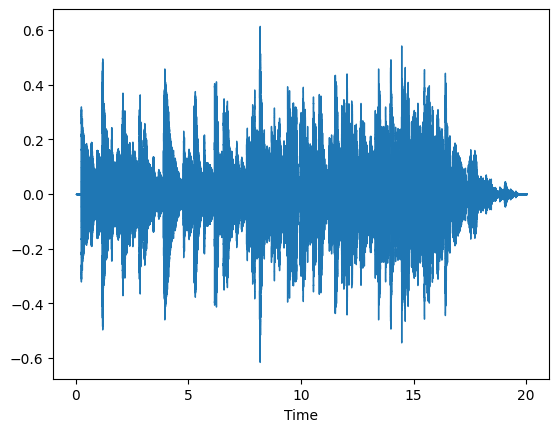

In [6]:
### plot signal
librosa.display.waveshow(x, sr=sr)

In [7]:
from IPython.display import Audio

### play back audio
Audio(data=x, rate=sr)

## Sinusoidal Waves

In [8]:
import numpy as np

amplitude = 5 # amplitude
f0 = 440 # frequency
phase = np.pi # phase offset

duration = 2 # audio duration
fs = 8000 # sampling rate

N = int(fs * duration) # signal length
t = np.arange(N) / fs # time series

x = amplitude * np.cos(2 * np.pi * f0 * t + phase) # cosine wave signal

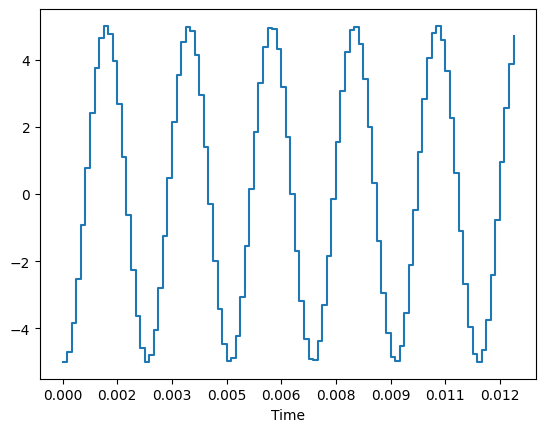

In [9]:
librosa.display.waveshow(x[:100], sr=fs)

In [10]:
Audio(data=x, rate=fs)

## Aliasing

In [11]:
fs = 8000

f0_original = 440
f0_alias = f0_original + fs

duration = 2

N = int(fs * duration)
t = np.arange(N) / fs

x_original = np.cos(2 * np.pi * f0_original * t)
x_alias = np.cos(2 * np.pi * f0_alias * t)

In [12]:
print('sampling rate = %d Hz, f0 original = %d Hz' % (fs, f0_original))
Audio(data=x_original, rate=fs)

sampling rate = 8000 Hz, f0 original = 440 Hz


In [13]:
print('sampling rate = %d Hz, f0 alias = %d Hz' % (fs, f0_alias))
Audio(data=x_alias, rate=fs)

sampling rate = 8000 Hz, f0 alias = 8440 Hz


# The Discrete Fourier Transform

## DFT

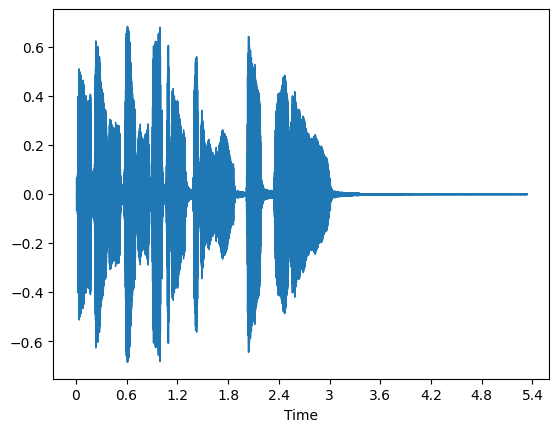

In [14]:
### load audio example from librosa
x, sr = librosa.load(librosa.ex('trumpet'))

librosa.display.waveshow(x, sr=sr)

In [15]:
### compute the DFT of the signal
X = np.fft.fft(x)

In [16]:
X # DFT components

array([ 0.00431729-6.66133815e-16j, -0.00627852+2.00846977e-03j,
        0.0109353 +1.04817679e-02j, ...,  0.00929817+9.73857755e-03j,
        0.0109353 -1.04817679e-02j, -0.00627852-2.00846977e-03j])

In [17]:
np.abs(X) # magnitude of the DFT components

array([0.00431729, 0.00659195, 0.01514755, ..., 0.01346461, 0.01514755,
       0.00659195])

In [18]:
np.angle(X) # phase of the DFT components

array([-1.54294331e-13,  2.83198463e+00,  7.64225064e-01, ...,
        8.08528730e-01, -7.64225064e-01, -2.83198463e+00])

In [19]:
### compute DFT analysis frequencies
N = len(x)
freqs = np.fft.fftfreq(N, 1.0/sr)

In [20]:
freqs # DFT frequencies

array([ 0.        ,  0.18749841,  0.37499681, ..., -0.56249522,
       -0.37499681, -0.18749841])

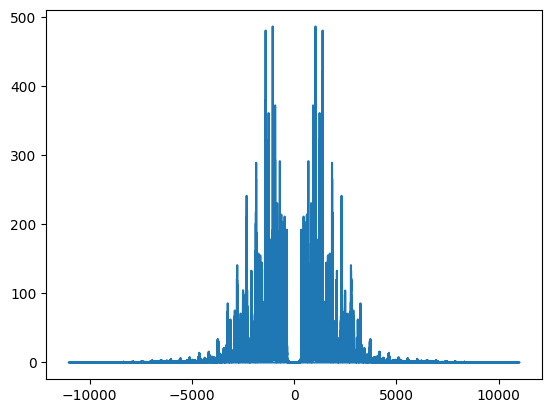

In [21]:
import matplotlib.pyplot as plt

plt.plot(freqs, np.abs(X))

## Inverse DFT

In [22]:
### compute the inverse DFT
x_inverse = np.fft.ifft(X)
x_inverse = np.real(x_inverse) # take the real part of the IDFT

Original Audio:


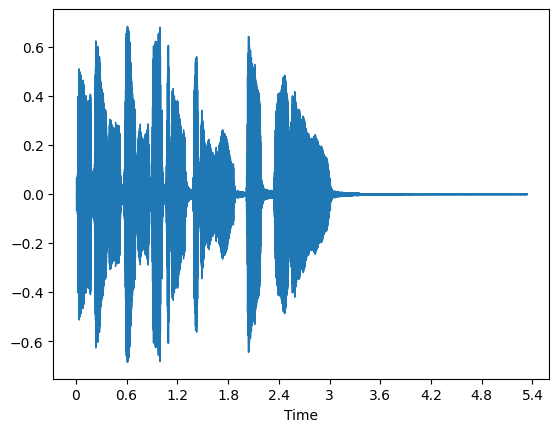

In [23]:
print('Original Audio:')
librosa.display.waveshow(x, sr=sr)

Inverse DFT:


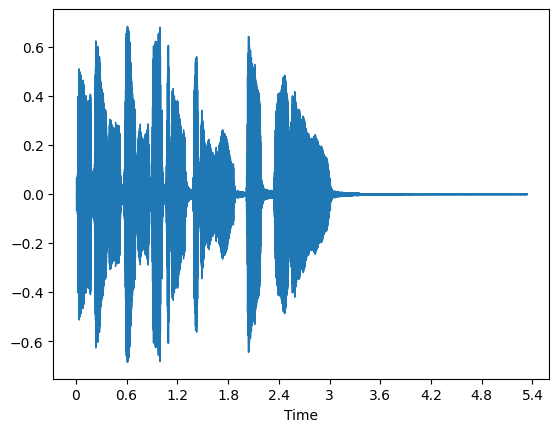

In [24]:
print('Inverse DFT:')
librosa.display.waveshow(x_inverse, sr=sr)

## STFT

In [25]:
N_f = 1024 # frame length
N_h = 512 # hop length

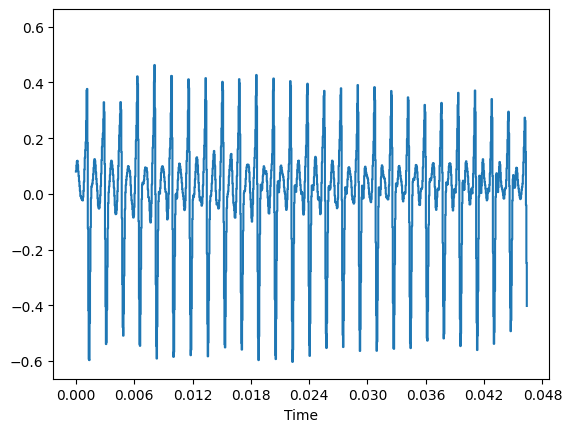

In [26]:
### plot the kth frame
k = 10
librosa.display.waveshow(x[k*N_h:k*N_h+N_f], sr=sr)

In [27]:
### compute the spectrum through STFT
S = np.abs(librosa.stft(x, n_fft=N_f, hop_length=N_h))
S = librosa.amplitude_to_db(S, ref=np.max) # convert the magnitude to dB

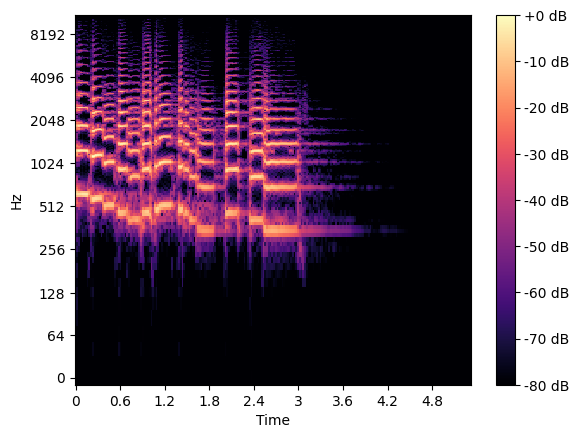

In [28]:
## plot the spectrugram
fig = plt.figure()
img = librosa.display.specshow(S, y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, format="%+2.f dB")